# New Model Findings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import ImageGrid
import datetime
from dateutil.relativedelta import relativedelta
import time

from cartopy import crs as ccrs, feature as cfeature
import warnings
warnings.filterwarnings('ignore')

import xarray as xr
import glob, os
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'
import xskillscore as xs

from eofs.xarray import Eof
from eofs.standard import Eof as sEof # If needed
from eofs.multivariate.standard import MultivariateEof

from scipy import stats
import statsmodels.api as sm

sp = ccrs.SouthPolarStereo()
pc = ccrs.PlateCarree()
import matplotlib.patches as mpatches

In [2]:
# load in persistences. there's just one per region.
def load_parrays(matrix_type, region):
    # load in new corr persistence, new rmse persistence
    path = f'/d6/bxw2101/model_files/{matrix_type}_analysis/{region}'
    new_pc = np.loadtxt(f'{path}/persistence-corr.txt')
    new_pr = np.loadtxt(f'{path}/persistence-rmse.txt')
    
    # load in old corr persistence, old rmse persistence
    path = f'/d6/bxw2101/o_model_files/{matrix_type}_analysis/{region}'
    old_pc = np.loadtxt(f'{path}/persistence-corr.txt')
    old_pr = np.loadtxt(f'{path}/persistence-rmse.txt')
    return new_pc, new_pr, old_pc, old_pr

In [3]:
# load in the corr/rmses. one for each model.
def load_arrays(matrix_type, region, fname, modes):
    model_name = f'{fname}-{modes}'
    
    # Load in new correlation, new rmse
    path = f'/d6/bxw2101/model_files/{matrix_type}_analysis/{region}'
    new_c = np.loadtxt(f'{path}/{fname}/{fname}-{modes}-corr.txt')
    new_r = np.loadtxt(f'{path}/{fname}/{fname}-{modes}-rmse.txt')


    # Load in old correlation, old rmse
    path = f'/d6/bxw2101/o_model_files/{matrix_type}_analysis/{region}'
    old_c = np.loadtxt(f'{path}/{fname}/{fname}-{modes}-corr.txt')
    old_r = np.loadtxt(f'{path}/{fname}/{fname}-{modes}-rmse.txt')
    return new_c, new_r, old_c, old_r

In [4]:
matrix_type = 'cross'

## same variables (without SST), new model vs old model corr +rmse. dp1

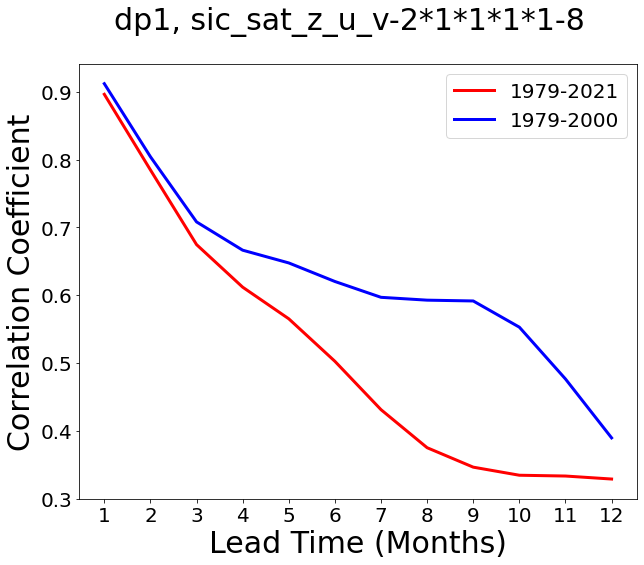

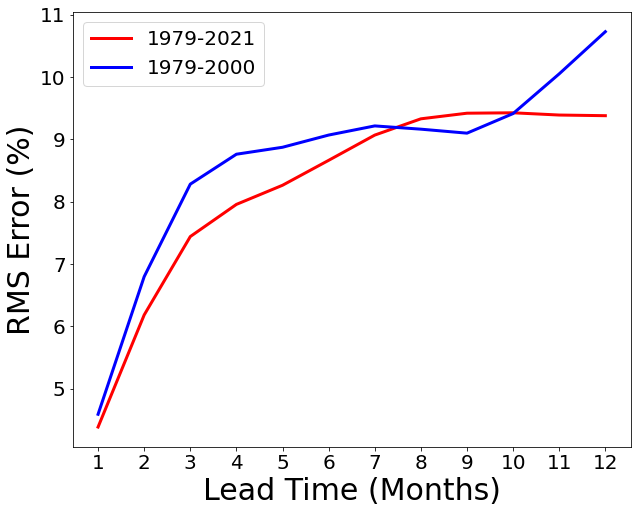

In [5]:
region = 'dp1_region'
fname = 'sic_sat_z_u_v-2*1*1*1*1'
modes=8
model_name = f'{fname}-{modes}'
new_c, new_r, old_c, old_r =load_arrays(matrix_type, region, fname, modes)
new_pc, new_pr, old_pc, old_pr = load_parrays(matrix_type, region)

xticks = np.arange(1, 13)

#building out the correlation plot: first graph the persistence correlation, then the model correlations.
fig = plt.figure(figsize=(10,8))
plt.suptitle(f'dp1, {model_name}', fontsize=30)

plt.plot(xticks, new_c, linewidth=3, color='red')
plt.plot(xticks, old_c, linewidth=3, color='blue')

#format and name the correlation plot.
plt.yticks(fontsize=20)
plt.xticks(xticks, fontsize=20);
plt.ylabel('Correlation Coefficient', fontsize=30)
plt.xlabel('Lead Time (Months)', fontsize=30)
plt.legend(['1979-2021', '1979-2000'], prop={'size': 20})
plt.show()

#building out the rmse plot: first graph persistence rmse, then the model rmses.
fig = plt.figure(figsize=(10,8))
#plt.plot(xticks, persistence_r*100, linewidth = 3, color = 'k', linestyle='dashed')

plt.plot(xticks, new_r*100, linewidth = 3, color='red')
plt.plot(xticks, old_r*100, linewidth = 3, color='blue')


#format and name the rmse plot.
plt.yticks(fontsize=20)
plt.xticks(xticks, fontsize=20)
plt.ylabel('RMS Error (%)', fontsize=30)
plt.xlabel('Lead Time (Months)', fontsize=30)
plt.legend(['1979-2021', '1979-2000'], prop={'size': 20})
plt.show()

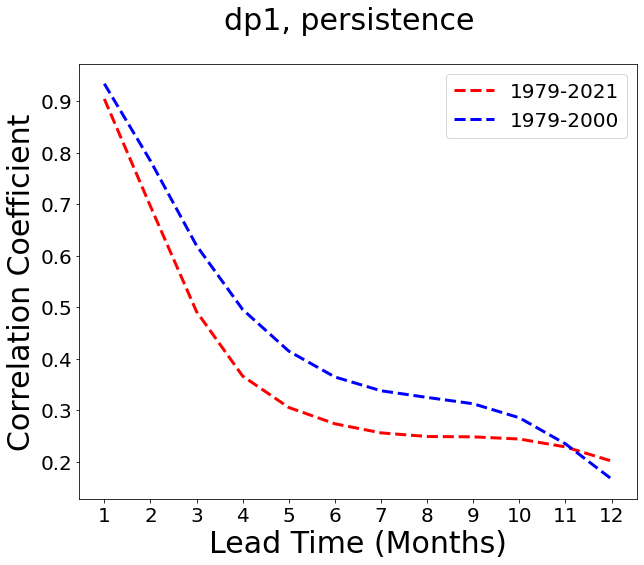

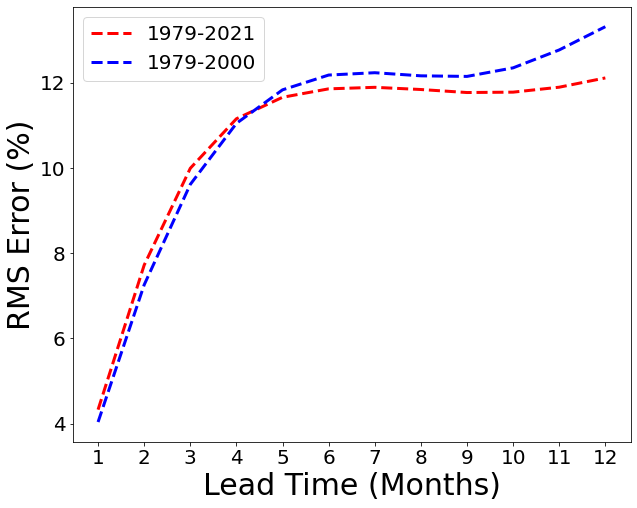

In [6]:
xticks = np.arange(1, 13)

#building out the correlation plot: first graph the persistence correlation, then the model correlations.
fig = plt.figure(figsize=(10,8))
plt.suptitle('dp1, persistence', fontsize=30)

plt.plot(xticks, new_pc, linewidth = 3, color = 'red', linestyle='dashed')
plt.plot(xticks, old_pc, linewidth = 3, color = 'blue', linestyle='dashed')

#format and name the correlation plot.
plt.yticks(fontsize=20)
plt.xticks(xticks, fontsize=20);
plt.ylabel('Correlation Coefficient', fontsize=30)
plt.xlabel('Lead Time (Months)', fontsize=30)
plt.legend(['1979-2021', '1979-2000'], prop={'size': 20})
plt.show()

#building out the rmse plot: first graph persistence rmse, then the model rmses.
fig = plt.figure(figsize=(10,8))

plt.plot(xticks, new_pr*100, linewidth = 3, color='red', linestyle='dashed')
plt.plot(xticks, old_pr*100, linewidth = 3, color = 'blue', linestyle='dashed')


#format and name the rmse plot.
plt.yticks(fontsize=20)
plt.xticks(xticks, fontsize=20)
plt.ylabel('RMS Error (%)', fontsize=30)
plt.xlabel('Lead Time (Months)', fontsize=30)
plt.legend(['1979-2021', '1979-2000'], prop={'size': 20})
plt.show()

# Looking at SAME region, different models

In [9]:
# Comparing different models in the SAME region

def model_comp(region, fname_list, modes_list):
    new_pc, new_pr, old_pc, old_pr = load_parrays(matrix_type, region)

    fig, axs = plt.subplots(2, 4, sharex=True)
    fig.set_figheight(8)
    fig.set_figwidth(20)
    fig.suptitle(region, fontsize=30)

    xticks = np.arange(1, 13)
    axs[0, 0].set_xticks(xticks)
    axs[0, 0].set_ylabel('Correlation Coefficient')
    axs[1, 0].set_ylabel('RMS Error (%)')

    # Persistence Column
    axs[0, 0].set_title('persistence')
    axs[0, 0].plot(xticks, new_pc, linewidth = 3, color = 'red', linestyle='dashed')
    axs[0, 0].plot(xticks, old_pc, color = 'blue', linestyle='dashed')
    axs[0, 0].legend(['1979-2021', '1979-2000'])

    axs[1, 0].plot(xticks, new_pr*100, linewidth = 3, color='red', linestyle='dashed')
    axs[1, 0].plot(xticks, old_pr*100, color = 'blue', linestyle='dashed')
    axs[1, 0].legend(['1979-2021', '1979-2000'])
    axs[1, 0].set_xlabel('Lead time (Months)')

    # Model Columns: indices 1-3

    for i in range(len(fname_list)):
        fname = fname_list[i]
        modes = modes_list[i]
        model_name = f'{fname}-{modes}'
        new_c, new_r, old_c, old_r =load_arrays(matrix_type, region, fname, modes)

        axs[0, i+1].set_title(model_name)
        axs[0, i+1].plot(xticks, new_c, linewidth = 3, color='red')
        axs[0, i+1].plot(xticks, old_c, color='blue')

        axs[1, i+1].plot(xticks, new_r*100, linewidth = 3, color='red')
        axs[1, i+1].plot(xticks, old_r*100, color='blue')
        axs[1, i+1].set_xlabel('Lead time (Months)')

    plt.tight_layout()

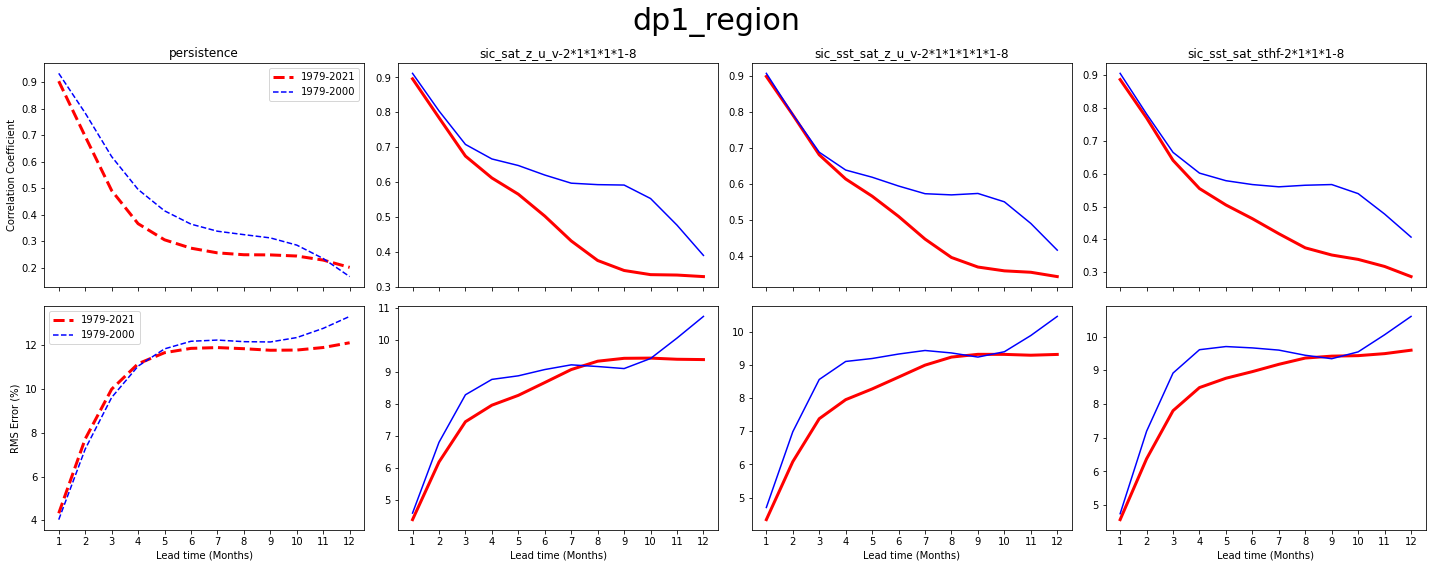

In [10]:
region = 'dp1_region'
fname_list = ['sic_sat_z_u_v-2*1*1*1*1', 'sic_sst_sat_z_u_v-2*1*1*1*1*1', 'sic_sst_sat_sthf-2*1*1*1']
modes_list = [8, 8, 8, 8]
model_comp(region, fname_list, modes_list)

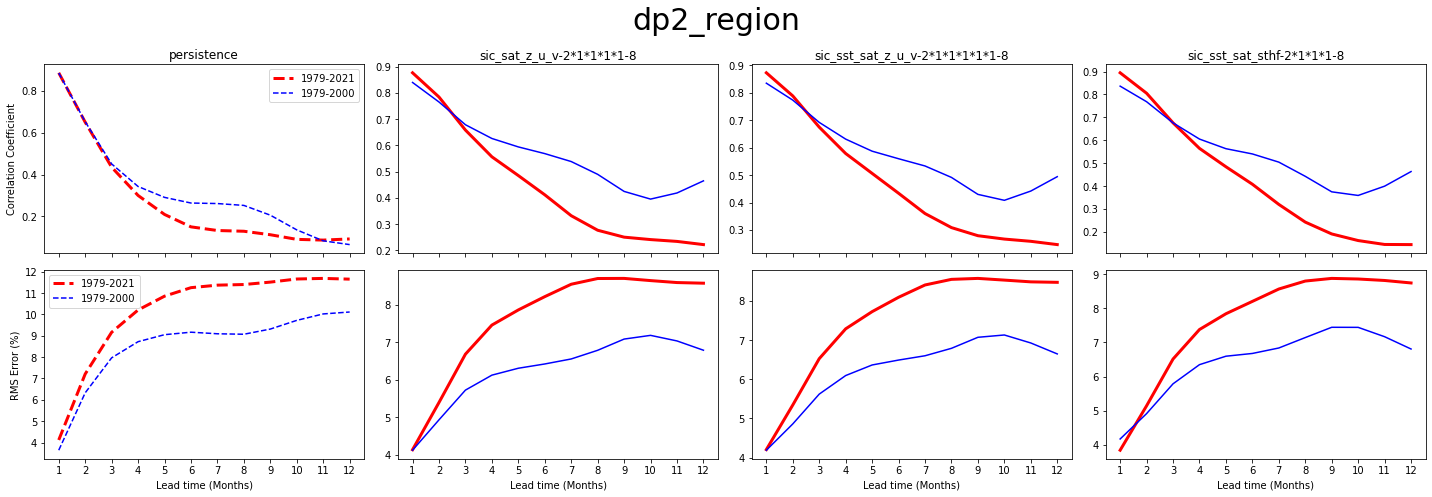

In [36]:
region = 'dp2_region'
fname_list = ['sic_sat_z_u_v-2*1*1*1*1', 'sic_sst_sat_z_u_v-2*1*1*1*1*1', 'sic_sst_sat_sthf-2*1*1*1']
modes_list = [8, 8, 8, 8]
model_comp(region, fname_list, modes_list)

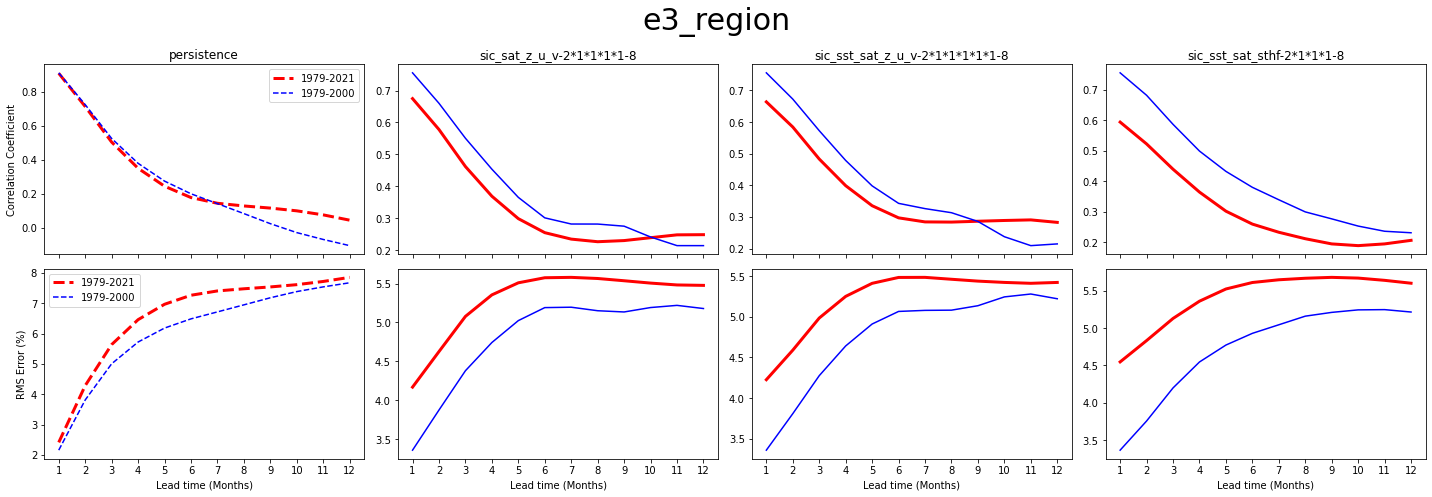

In [37]:
region = 'e3_region'
fname_list = ['sic_sat_z_u_v-2*1*1*1*1', 'sic_sst_sat_z_u_v-2*1*1*1*1*1', 'sic_sst_sat_sthf-2*1*1*1']
modes_list = [8, 8, 8, 8]
model_comp(region, fname_list, modes_list)

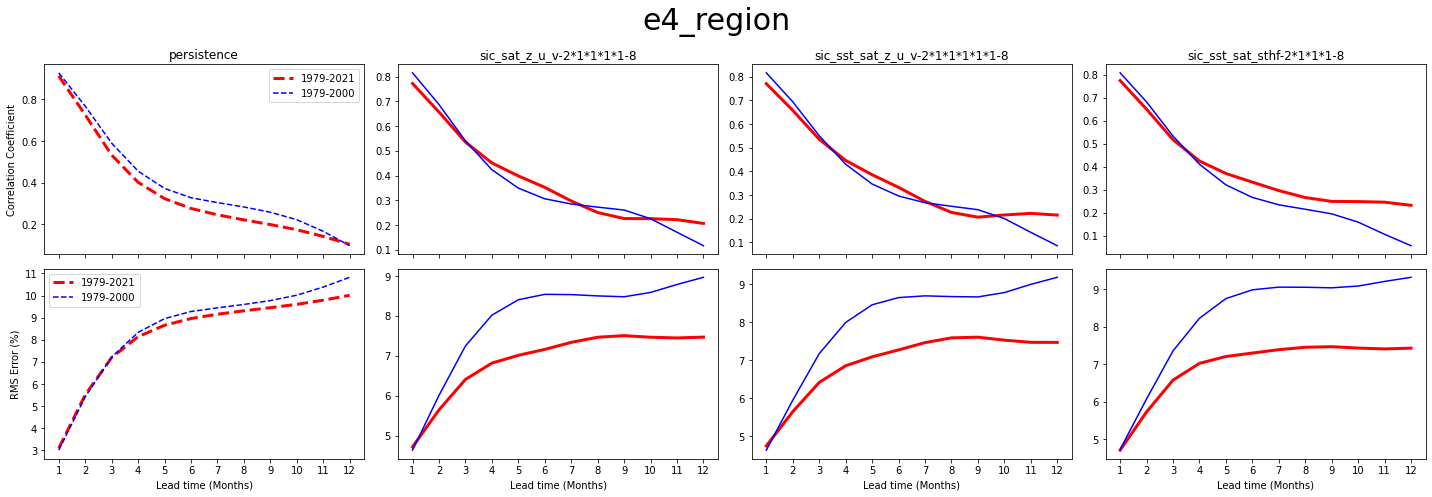

In [38]:
region = 'e4_region'
fname_list = ['sic_sat_z_u_v-2*1*1*1*1', 'sic_sst_sat_z_u_v-2*1*1*1*1*1', 'sic_sst_sat_sthf-2*1*1*1']
modes_list = [8, 8, 8, 8]
model_comp(region, fname_list, modes_list)

# Looking at DIFFERENT region, same models

In [11]:
# Comparing the SAME specific model (same variables) over different regions
# the regions: dp1_region, dp2_region, e3_region, e4_region
def region_comp(fname, modes):
    model_name = f'{fname}-{modes}'

    # Setting up the plot: define dimensions, vert axes labels
    fig, axs = plt.subplots(2, 4, sharex=True)
    fig.set_figheight(8)
    fig.set_figwidth(20)
    fig.suptitle(model_name, fontsize=30)

    xticks = np.arange(1, 13)
    axs[0, 0].set_xticks(xticks)
    axs[0, 0].set_ylabel('Correlation Coefficient')
    axs[1, 0].set_ylabel('RMS Error (%)')

    regions = ['dp1_region', 'dp2_region', 'e3_region', 'e4_region']

    for i in range(len(regions)):
        region = regions[i]

        new_c, new_r, old_c, old_r =load_arrays(matrix_type, region, fname, modes)
        new_pc, new_pr, old_pc, old_pr = load_parrays(matrix_type, region)
        axs[0, i].set_title(region, fontsize=15)

        # Plot correlation and the correlation persistence
        axs[0, i].plot(xticks, new_c, linewidth = 3, color='red')
        axs[0, i].plot(xticks, old_c, color='blue')
        axs[0, i].plot(xticks, new_pc, linewidth = 3, color = 'red', linestyle='dashed')
        axs[0, i].plot(xticks, old_pc, color = 'blue', linestyle='dashed')
        axs[0, i].legend(['1979-2021', '1979-2000'])

        # Plot rmse and the rmse persistence
        axs[1, i].plot(xticks, new_r*100, linewidth = 3, color='red')
        axs[1, i].plot(xticks, old_r*100, color='blue')
        axs[1, i].plot(xticks, new_pr*100, linewidth = 3, color='red', linestyle='dashed')
        axs[1, i].plot(xticks, old_pr*100, color = 'blue', linestyle='dashed')
        axs[1, i].legend(['1979-2021', '1979-2000'])
        axs[1, i].set_xlabel('Lead time (Months)')

    plt.tight_layout()

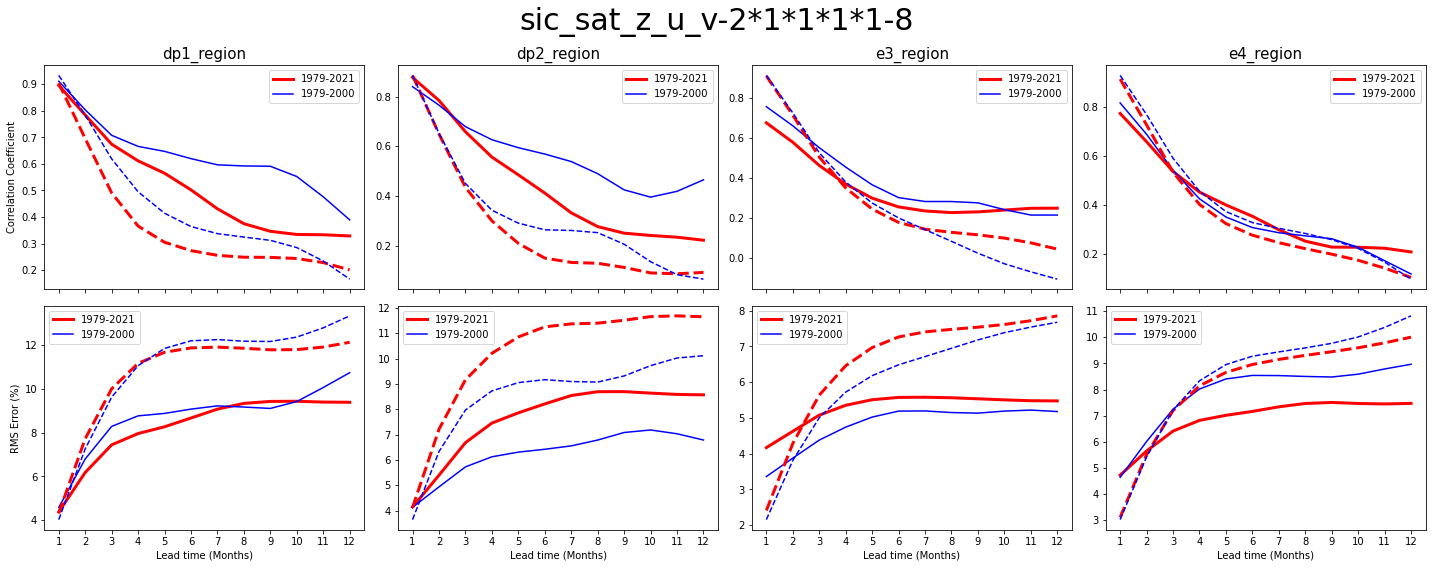

In [12]:
fname = 'sic_sat_z_u_v-2*1*1*1*1'
modes=8
region_comp(fname, modes)

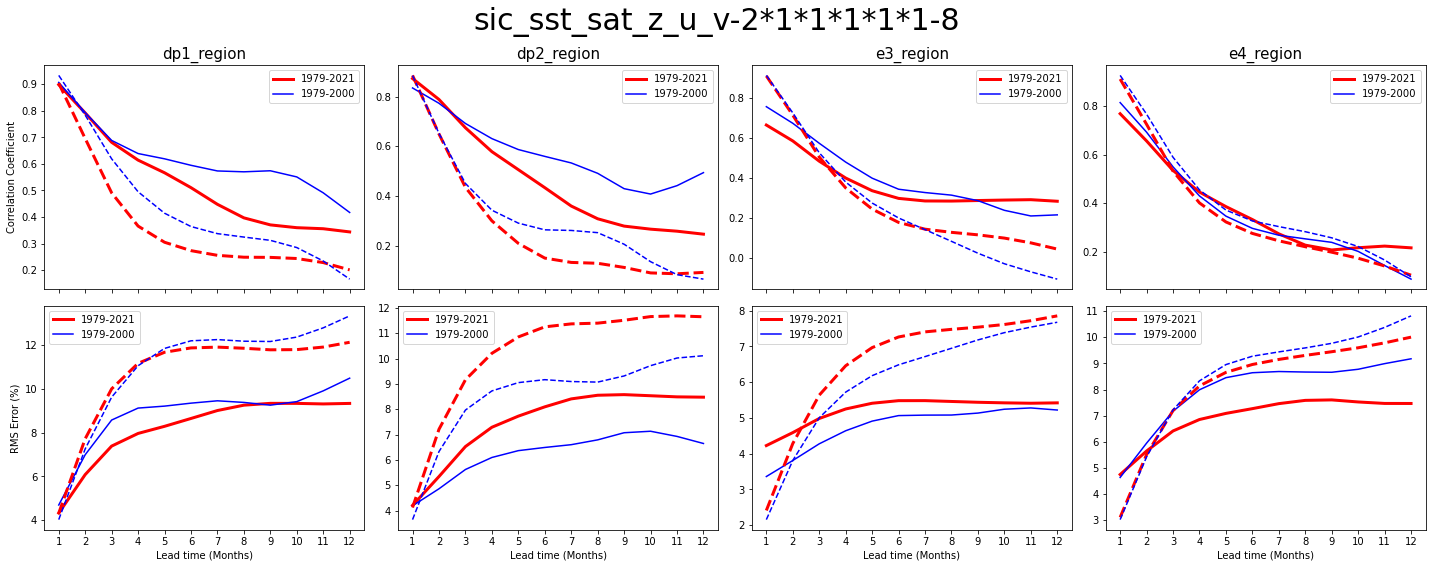

In [25]:
fname = 'sic_sst_sat_z_u_v-2*1*1*1*1*1'
modes=8
region_comp(fname, modes)

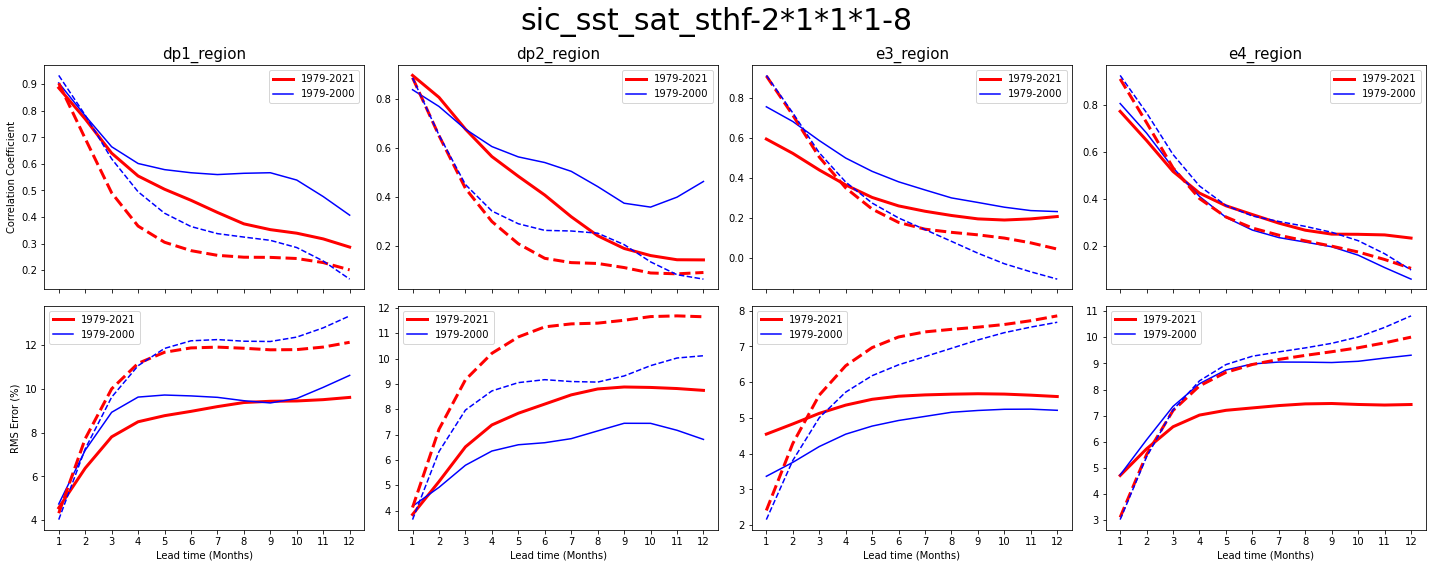

In [26]:
fname = 'sic_sst_sat_sthf-2*1*1*1'
modes=8
region_comp(fname, modes)

In [14]:
a = b = c = d = np.zeros(12)

# Now: Just looking at new models. For Ocean's contribution.

# Tryna find the BEST model, period

In [52]:
def list_avg_corrs(matrix_type, region, model_names_list):
    path = f'/d6/bxw2101/model_files/{matrix_type}_analysis/{region}'

    # Load in correlations and rmses for every file included.
    mean_corrs = []
    mean_rmses = []
    for model in model_names_list:
        first = model.split('-')[0]
        second = model.split('-')[1]
        fname = f'{first}-{second}'
        #print(np.loadtxt(f'{path}/{fname}/{model}-corr.txt'))
        mean_corrs.append(np.loadtxt(f'{path}/{fname}/{model}-corr.txt').mean())
        mean_rmses.append(np.loadtxt(f'{path}/{fname}/{model}-rmse.txt').mean())
    return mean_corrs, mean_rmses

In [209]:
def assess_all_models(matrix_type, region, f_names):
    fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
    fig.set_figheight(8)
    fig.set_figwidth(20)
    fig.suptitle(model_name, fontsize=30)
        
    all_mean_corrs = []
    all_mean_rmses = []
    # loop through every different model you've completely finished running
    for f_name in f_names:
        # get all 1-20 modes of a certain model
        model_names_list = [f'{f_name}-{str(i)}' for i in range(1, 20)]
        mc, mr = list_avg_corrs(matrix_type, region, model_names_list)
        all_mean_corrs.append(mc)
        all_mean_rmses.append(mr)
        
    im1 = axs[0].imshow(all_mean_corrs, cmap='plasma')
    plt.colorbar(im1)
    im2 = axs[1].imshow(all_mean_rmses, cmap='plasma')
    
    #plt.colorbar(im2)

    
    # draw gridlines
#     axs[0].grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    # ax.set_xticks(np.arange(-.5, 10, 1));
    
        
#     mode_ticks = np.arange(1, 20)
#     print(mode_ticks)
#     axs[0].set_xticks(mode_ticks, labels = mode_ticks)
#     axs[1].set_xticks(mode_ticks, labels = mode_ticks)
    file_number_ticks = np.arange(1, len(f_names) + 1)
    print(file_number_ticks)
    axs[0].set_yticks(file_number_ticks, labels=f_names)
    axs[1].set_yticks(file_number_ticks)
    
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")
    
    plt.tight_layout()
        
    

[1 2 3]


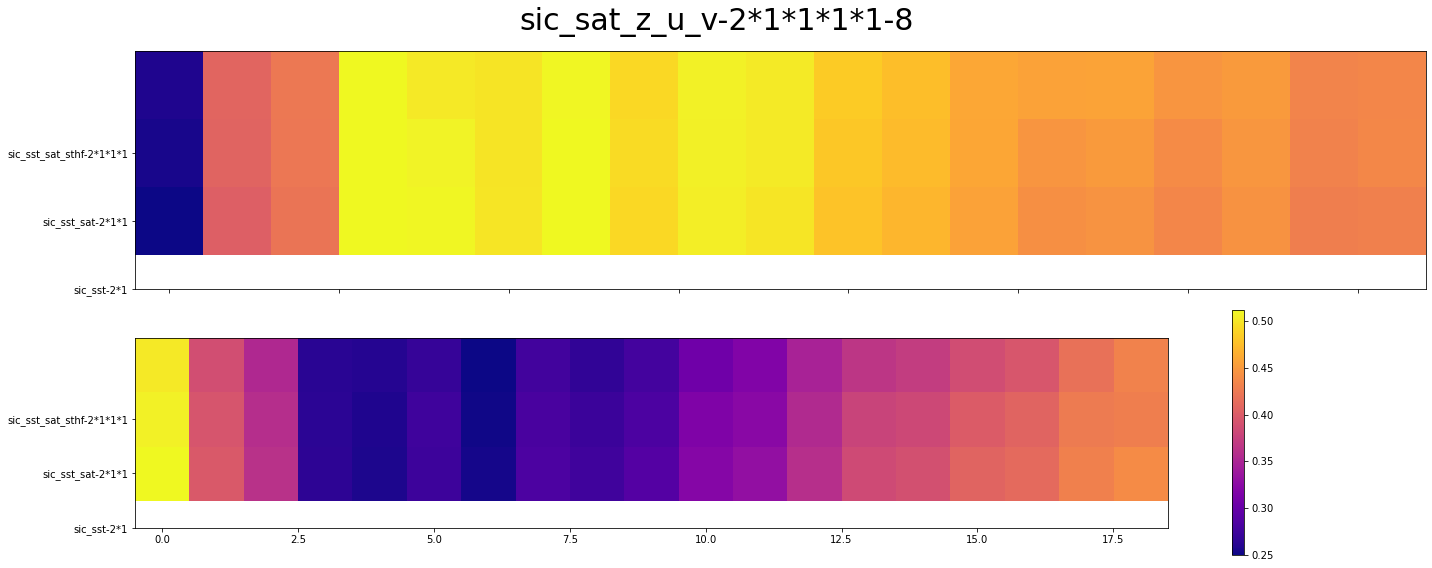

In [210]:
completely_ran_models = ['sic_sst_sat_sthf-2*1*1*1', 'sic_sst_sat-2*1*1', 'sic_sst-2*1']
assess_all_models('cross', 'dp1_region', completely_ran_models)


# Comparing SST to Non SST in the four regions

In [5]:
def load_all_new_arrays(matrix_type, region, model_names_list):
    path = f'/d6/bxw2101/model_files/{matrix_type}_analysis/{region}'

    # Load in correlations and rmses for every file included.
    corrs = []
    rmses = []
    for model in model_names_list:
        first = model.split('-')[0]
        second = model.split('-')[1]
        fname = f'{first}-{second}'
        corrs.append(np.loadtxt(f'{path}/{fname}/{model}-corr.txt'))
        rmses.append(np.loadtxt(f'{path}/{fname}/{model}-rmse.txt'))
        
    # load in corr persistence, rmse persistence for the region
    path = f'/d6/bxw2101/model_files/{matrix_type}_analysis/{region}'
    pc = np.loadtxt(f'{path}/persistence-corr.txt')
    pr = np.loadtxt(f'{path}/persistence-rmse.txt')
    return corrs, rmses, pc, pr

In [6]:
# Comparing the SAME specific model (same variables) over different regions
# the regions: dp1_region, dp2_region, e3_region, e4_region
def comp_new_models(model_names_list):
    print(model_names_list)

    # Setting up the plot: define dimensions, vert axes labels
    fig, axs = plt.subplots(2, 4, sharex=True)
    fig.set_figheight(8)
    fig.set_figwidth(20)
    fig.suptitle('Comparing different new models in different regions', fontsize=30)

    xticks = np.arange(1, 13)
    axs[0, 0].set_xticks(xticks)
    axs[0, 0].set_ylabel('Correlation Coefficient')
    axs[1, 0].set_ylabel('RMS Error (%)')

    regions = ['dp1_region', 'dp2_region', 'e3_region', 'e4_region']

    for i in range(len(regions)):
        region = regions[i]
        axs[0, i].set_title(region, fontsize=15)
        
        corrs, rmses, pc, pr = load_all_new_arrays(matrix_type, region, model_names_list)

        for j in range(len(corrs)):
            c = corrs[j]
            r = rmses[j]
            axs[0, i].plot(xticks, c)
            axs[1, i].plot(xticks, r*100)
        
        axs[0, i].plot(xticks, pc, linewidth = 3, color = 'red', linestyle='dashed')
        axs[0, i].legend(model_names_list)
        
        axs[1, i].plot(xticks, pr*100, linewidth = 3, color='red', linestyle='dashed')
        axs[1, i].legend(model_names_list)
        axs[1, i].set_xlabel('Lead time (Months)')

    plt.tight_layout()

['sic_sst_sat_sthf-2*1*1*1-9', 'sic_sat_sthf-2*1*1-9']


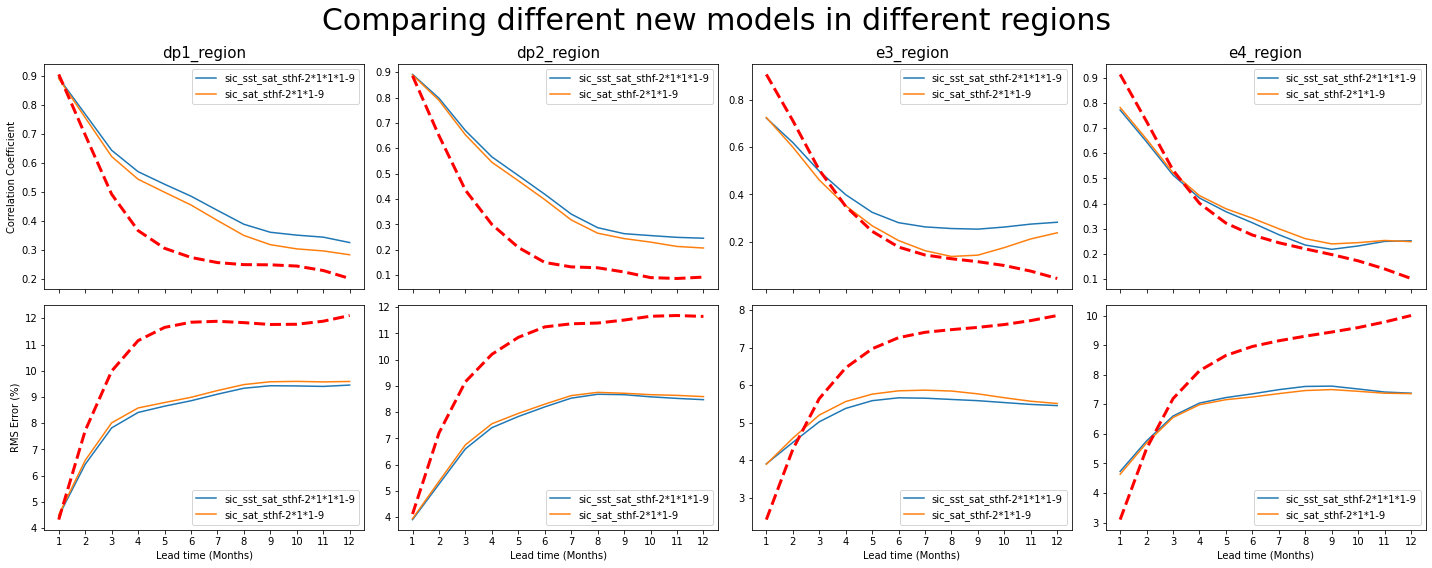

In [7]:
model_names_list = ['sic_sst_sat_sthf-2*1*1*1-9', 'sic_sat_sthf-2*1*1-9']
comp_new_models(model_names_list)

In [ ]:
# e3: SST has a higher contribution. raises the atmospheric model above persistence. pretty obvious.
# dp1, dp2: still a little better.
# e4: corr still near persistence tho. rip. no significant improvement with sst.
# across all combinations, error is reduced though. so not a complete fail!

['sic_sst_sat_sthf-2*1*1*1-9', 'sic_sst_sat_z_u_v-2*1*1*1*1*1-9']


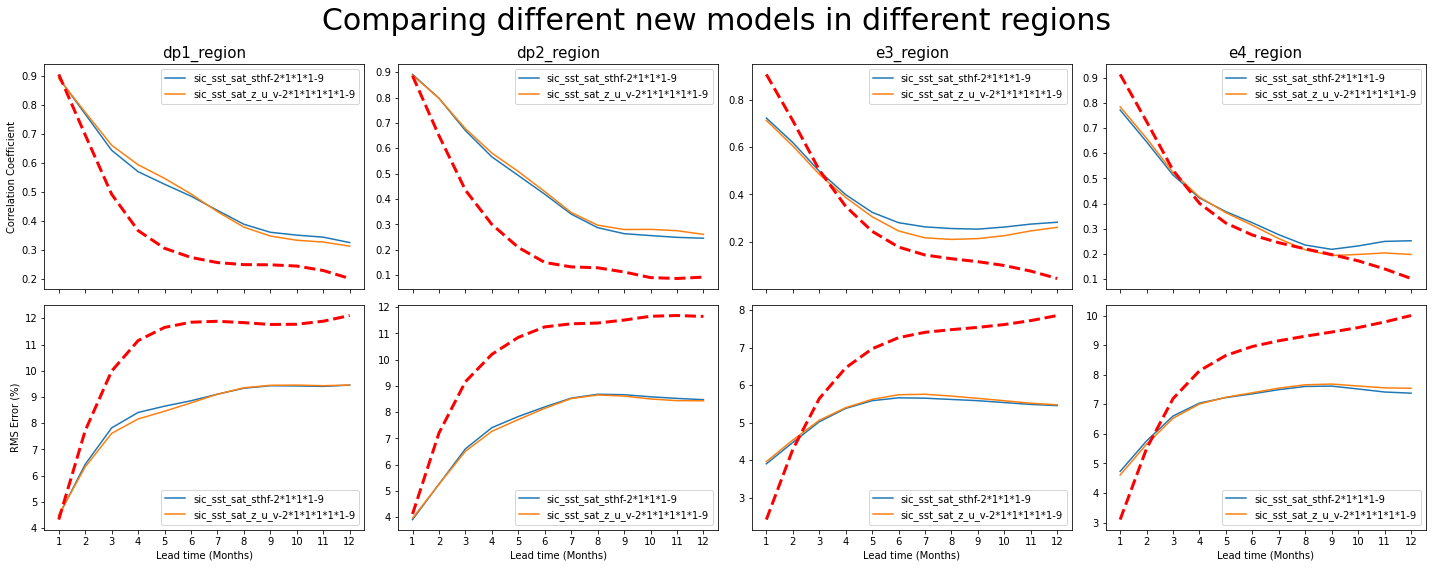

In [46]:
model_names_list = ['sic_sst_sat_sthf-2*1*1*1-9', 'sic_sst_sat_z_u_v-2*1*1*1*1*1-9']
comp_new_models(model_names_list)

['sic_sst_sat_sthf-2*1*1*1-5', 'sic_sst_sat_sthf-2*1*1*1-6', 'sic_sst_sat_sthf-2*1*1*1-7', 'sic_sst_sat_sthf-2*1*1*1-8', 'sic_sst_sat_sthf-2*1*1*1-9']


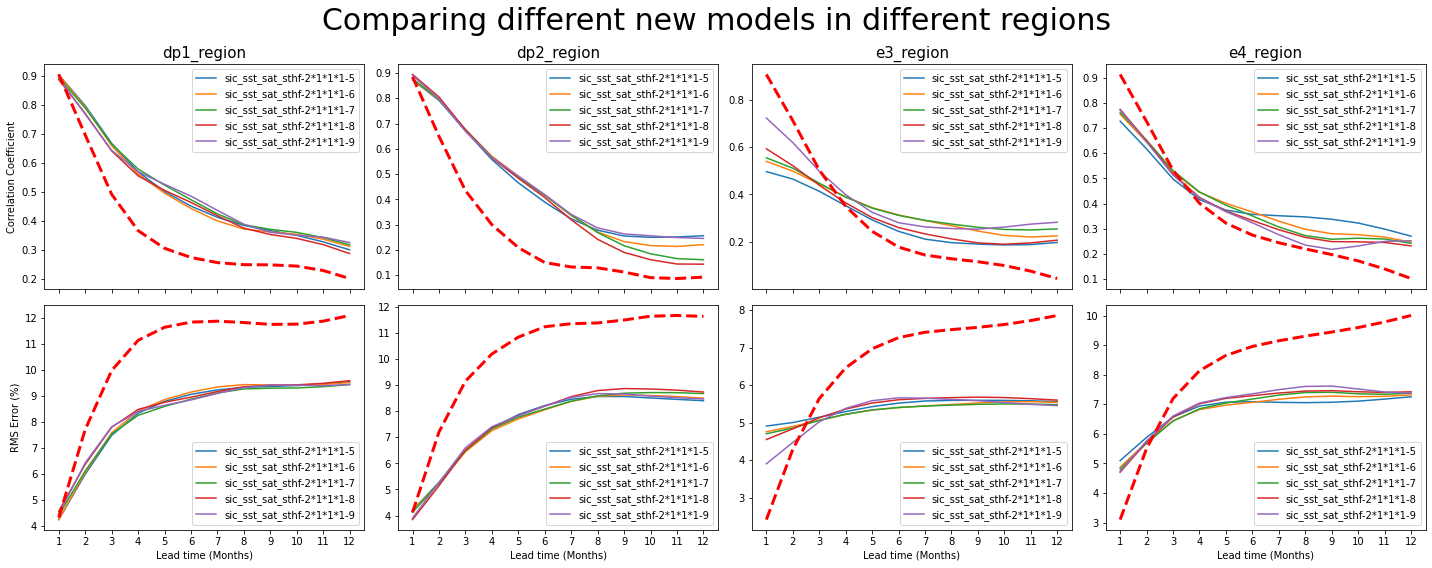

In [62]:
f_name = 'sic_sst_sat_sthf-2*1*1*1'
model_names_list = [f'{f_name}-{str(i)}' for i in range(5, 10)]
comp_new_models(model_names_list)